(1040, 1388)

dtype('float64')

<IPython.core.display.Javascript object>


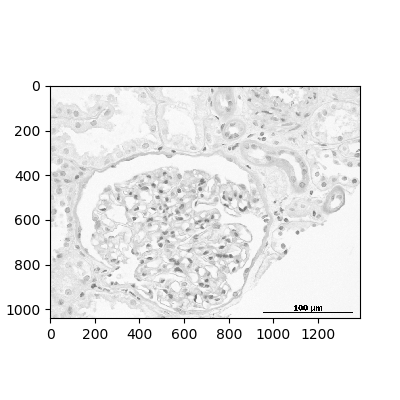

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
img = plt.imread('/home/rodri/Escritorio/tesis/PAS.jpg')
img_bw = 0.2989*img[:, :, 0] + 0.587*img[:, :, 1]+ 0.114*img[:, :, 2]

display(img_bw.shape)
display(img_bw.dtype)

plt.figure(figsize=(4, 4))
plt.imshow(img_bw, cmap=plt.cm.Greys_r);

In [8]:
data = {'A': torch.from_numpy(img[:256, :256, :].T.astype('float32')).unsqueeze(0), 'A_paths': '.'}
model.set_input(data)
model.test()

NameError: name 'torch' is not defined

In [20]:
visuals = model.get_current_visuals()

In [34]:
visuals

OrderedDict([('real_A',
              tensor([[[[214., 217., 219.,  ..., 201., 201., 197.],
                        [214., 216., 218.,  ..., 198., 197., 193.],
                        [217., 218., 218.,  ..., 197., 196., 192.],
                        ...,
                        [176., 186., 204.,  ..., 210., 207., 209.],
                        [181., 187., 205.,  ..., 209., 207., 207.],
                        [179., 188., 205.,  ..., 207., 210., 208.]],
              
                       [[229., 232., 234.,  ..., 196., 198., 194.],
                        [229., 231., 233.,  ..., 193., 194., 190.],
                        [232., 233., 233.,  ..., 194., 193., 189.],
                        ...,
                        [180., 190., 208.,  ..., 233., 233., 234.],
                        [182., 188., 206.,  ..., 232., 233., 232.],
                        [179., 188., 206.,  ..., 230., 233., 233.]],
              
                       [[222., 225., 229.,  ..., 216., 219., 215.],
  

(256, 256, 3)

<IPython.core.display.Javascript object>


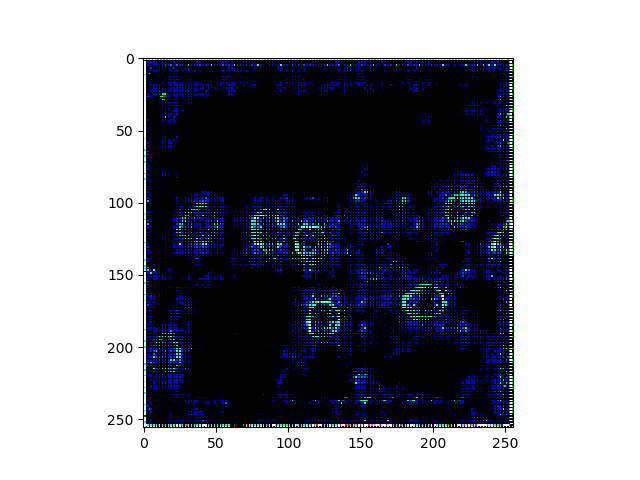

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [35]:
result = visuals['fake_B'].cpu().numpy()[0, :, :, :].T
display(result.shape)
plt.figure()
plt.imshow(result+1)

In [3]:
import torch
import os
from options.test_options import TestOptions
from data import CreateDataLoader
from models import create_model
from util.visualizer import save_images
from util import html

--dataroot <datapath> --name NU_SEG --gpu_ids 0 --display_id 0 
--loadSize 256 --fineSize 256

In [12]:
opt = TestOptions()#.parse()
opt.nThreads = 1   # test code only supports nThreads = 1
opt.batchSize = 1  # test code only supports batchSize = 1
opt.serial_batches = True  # no shuffle
opt.no_flip = True  # no flip
opt.display_id = -1  # no visdom display
opt.dataset_mode = "single"
opt.dataroot = "/home/rodri/Escritorio/tesis/"
opt.phase = "test"
opt.loadSize = 256
opt.fineSize = 256
opt.isTrain = False
opt.input_nc = 3
opt.output_nc = 3
opt.gpu_ids = [0]
opt.name = "NU_SEG"
opt.model_suffix = "test1"
opt.checkpoints_dir = "/home/rodri/Escritorio/tesis/NucleiSegmentation/checkpoints/"
opt.model = "test"
opt.ngf = 64
opt.norm = "instance"
opt.which_model_netG = "unet_256"
opt.resize_or_crop = "resize_and_crop"
opt.which_epoch = "latest"
opt.no_dropout = "store_true"
opt.init_type = "normal"
opt.init_gain = 0.02
opt.verbose = "store_true"
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
model = create_model(opt)
model.setup(opt)
    # create website

dataset [SingleImageDataset] was created
initialize network with normal
model [TestModel] was created
loading the model from /home/rodri/Escritorio/tesis/NucleiSegmentation/checkpoints/NU_SEG/latest_net_Gtest1.pth
---------- Networks initialized -------------
DataParallel(
  (module): UnetGenerator(
    (model): UnetSkipConnectionBlock(
      (model): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): UnetSkipConnectionBlock(
          (model): Sequential(
            (0): LeakyReLU(negative_slope=0.2, inplace=True)
            (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
            (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (3): UnetSkipConnectionBlock(
              (model): Sequential(
                (0): LeakyReLU(negative_slope=0.2, inplace=True)
                (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), paddi

In [4]:
torch.cuda.is_available()

True